<a href="https://colab.research.google.com/github/Sharath670/Mobile-Price-Range-Prediction-CP-3-/blob/main/Mobile_price_range_prediction(CP3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Sharath670/Mobile-Price-Range-Prediction-CP-3-

# **Problem Statement**


**The mobile phone industry is highly competitive, and prices play a significant role in the purchasing decisions of customers. To remain competitive, companies needs to price their mobile phones effectively. However, determining the optimal price range for a mobile phone is challenging, given the numerous factors that influence pricing decisions**

**The objective is to find out some relation between features of a mobile phone, and its selling price, and create a classification model to predict the price range.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/data_mobile_price_range.csv')

In [5]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Dataset First View

In [6]:
# Dataset First Look
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print( 'The shape is', dataset.shape)
print('The number of columns are',len(dataset.columns))
print('The number of rows are',len(dataset.index))

The shape is (2000, 21)
The number of columns are 21
The number of rows are 2000


### Dataset Information

In [9]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print('The number of duplicated values are',len(dataset[dataset.duplicated()]))

The number of duplicated values are 0


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print('The number of null values are',dataset.isnull().sum().sum())

The number of null values are 0


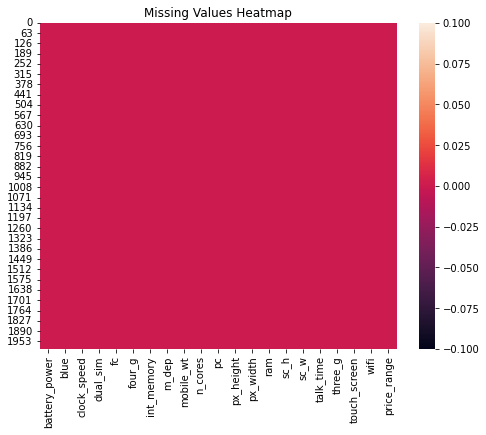

In [12]:
# Visualizing the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.isnull())
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

This is a dataset containing features of different mobile phones and their price ranges. It has 21 columns and 2000 rows. The dataset does not have any null values or duplicate values.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Dataset Describe
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

**Battery_power** : Battery capacity in mAh

**Blue** : Has bluetooth or not

**Clock_speed** : speed at which microprocessor executes instructions

**Dual_sim** : Has dual sim support or not

**Fc** : Front Camera megapixels

**Four_g** : Has 4G or not

**int_memory** : internal memory capacity

**M_dep**: Mobile depth in cm

**MObile_wt**: Weight of mobiles phone

**N_cores**: Number of cores in processor

**Pc** : Primary Camera mega pixels

**Px height** : Pixel resolution height

**Px width**: Pixel resolution width

**Ram**: Random Access Memory in MB

**sc_h**: Screen Height

**sc_w**: Screen width

**Talk time** : Longest that a single battery can last
overa call

**Three_g**: Has 3g or not

**wifi** : Has wifi or not

**touch_screen** : Has touch screen or not

**Price_range** : This is the target variable with a value of 0(low cost) 1(medium cost), 2 (high cost),3(very high cost)




### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [17]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [18]:
df.groupby('price_range')['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

In [19]:
df.groupby('price_range')['battery_power'].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [20]:
print(df['three_g'].value_counts())
print(df['four_g'].value_counts())

1    1523
0     477
Name: three_g, dtype: int64
1    1043
0     957
Name: four_g, dtype: int64


In [21]:
len(df[(df['three_g'] == 1) & (df['four_g'] == 1)])

1043

In [22]:
len(df[df['blue']==1])
len(df['blue'])
pct=(len(df[df['blue']==1])/len(df['blue']))*100
pct

49.5

In [23]:
print(df.groupby('price_range')['px_height'].mean())
print(df.groupby('price_range')['px_width'].mean())



price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64
price_range
0    1150.270
1    1251.908
2    1234.046
3    1369.838
Name: px_width, dtype: float64


In [24]:
print(len(df[df['touch_screen']==1]))
print(len(df[df['touch_screen']==0]))

1006
994


In [25]:
print(df[df['three_g'] == 1]['talk_time'].mean())
print(df[df['three_g'] == 0]['talk_time'].mean())

10.880499015101773
11.427672955974844


In [26]:
df.groupby('n_cores')['ram'].mean()

n_cores
1    2153.202479
2    2089.639676
3    2082.808943
4    2090.569343
5    2210.739837
6    2110.847826
7    2155.370656
8    2103.300781
Name: ram, dtype: float64

In [27]:
print(df[df['four_g'] == 1]['int_memory'].mean())
print(df[df['four_g'] == 0]['int_memory'].mean())

32.19750719079578
31.88192267502612


In [28]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [29]:
df.groupby('price_range')['pc'].mean()

price_range
0     9.574
1     9.924
2    10.018
3    10.150
Name: pc, dtype: float64

### What all manipulations have you done and insights you found?

The insights I have found are:



1. Low cost, medium cost, high cost and very high cost, all have equal number of observations in the data (500 each).

2. As the price range increase, the average amount of ram increases.

3. As the price range increase, the average battery power of ram increases.

4. More number of phones support 3G as compared to 4g.

5. More than half of the phones have both 3G and 4G.

6. 49.5 percent of the phones in this dataset have bluetooth.

7. The pixel height and the width increases as the phones get costlier.

8. In the dataset, thers is almost equal number of phones with and without touchscreen.

9. The average talktime is sligtly more on a phone with 4g.

10. Phones with 5 cores have the highest average ram amount.

11. As the camera mega pixel increases, the price range also increases.

12. Most of the phones have dual sim.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar plot of price range 

Text(0.5, 1.0, 'Mobile Phone Price Range Distribution')

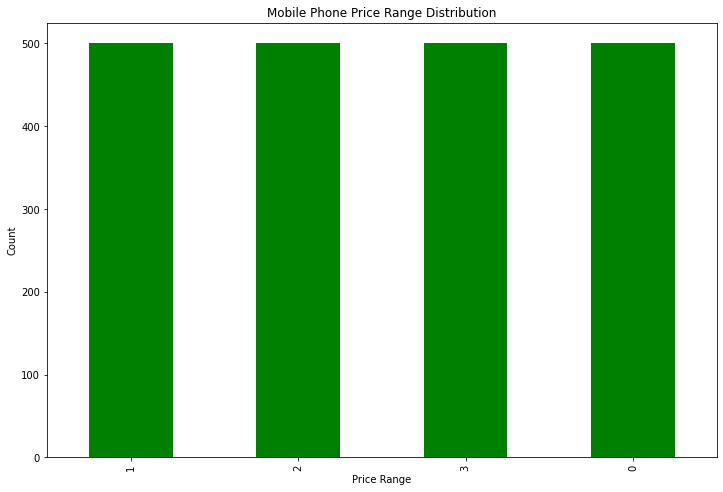

In [30]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 8))
df['price_range'].value_counts().plot.bar(color='green')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Mobile Phone Price Range Distribution')

##### 1. Why did you pick the specific chart?

I used a bar chart since it is easy to visualize the counts of categorical variables, where the hight of the rectangular bars are proportional to the amount on the Y axis. It can easily be used to visualize which category has more frequency in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From this chart I can see that all the price ranges have equal number of observations in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this particular plot, I cannot make any business decision, I can only use it to understand how the count of the variables.

#### Chart - 2 Histogram of battery power 

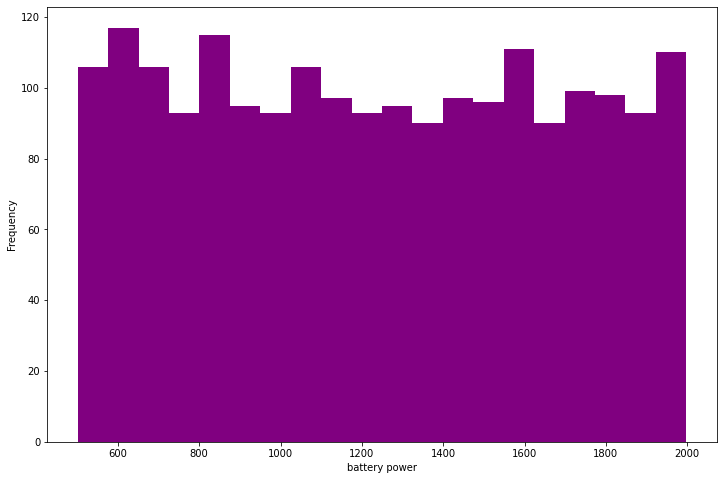

In [31]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8)) #
plt.hist(df['battery_power'],bins=20,color='purple')
plt.xlabel('battery power')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the frequency of having a battery power of 600-650 is the highest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, phone companies can make sure that their phones who fall in the 600-650 battery capacity range, are availible easily, as it seems that that is what most people prefer to buy, and also try and make more number of phones in that battery capacity range.

#### Chart - 3 Pie chart of the percentage count of number of cores 

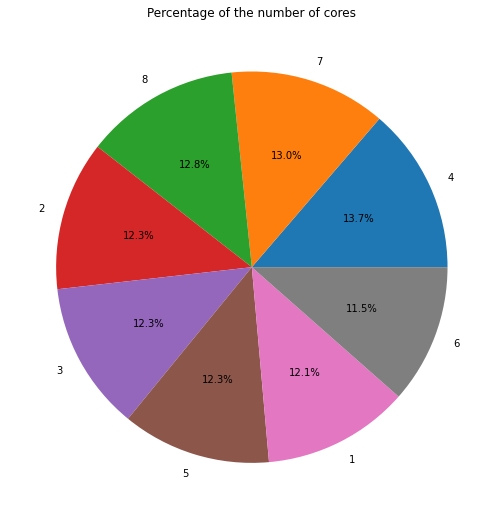

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 9))
q=df['n_cores'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%')
plt.title('Percentage of the number of cores')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage of the number of cores in mobile phones.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this,  I can clearly see that phones with 4 cores have a higher count than phones with other cores and phones with 6 cores have the least count in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight, phone companies can try to make phones with 8 cores, since thats what people would prefer.

#### Chart - 4 Donut chart of 4G support in Mobile phones.

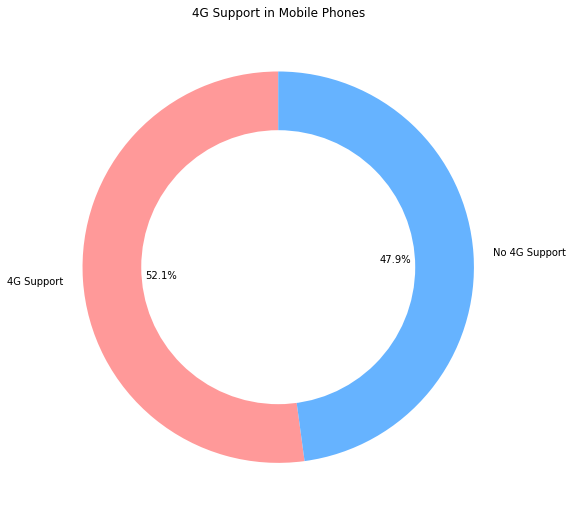

In [64]:
# Chart - 5 visualization code

four_g_count = df.four_g.value_counts()
labels = ['4G Support', 'No 4G Support']
sizes = [four_g_count[1], four_g_count[0]]
colors = ['#ff9999','#66b3ff']
fig, ax = plt.subplots(figsize=(12, 9))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)


plt.title('4G Support in Mobile Phones')
plt.show() 







##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the percentage of phones that have 4g support.

##### 2. What is/are the insight(s) found from the chart?

I can see that most of the phones have 4g support.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mobile phone companies should make sure that their phones have 4G support to keep them competitive in the market, as most phones already seem to support 4G.

#### Chart - 5 Scatterplot of ram and price range 

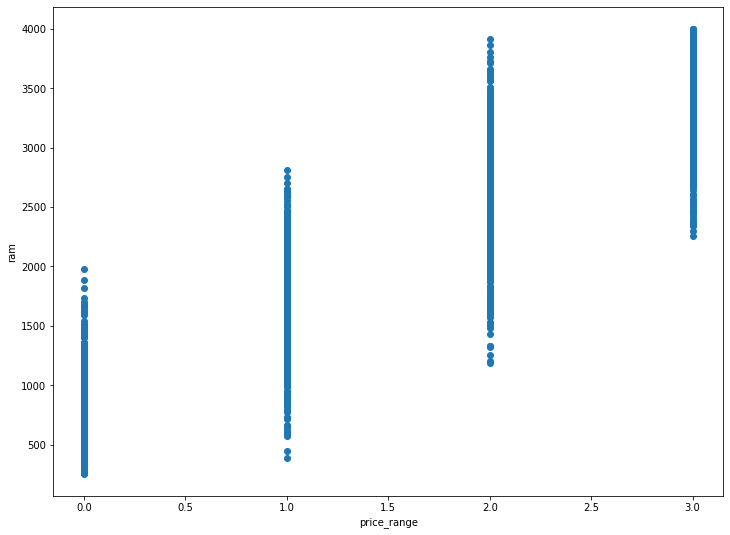

In [33]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 9))
plt.scatter(df['price_range'],df['ram'])
plt.xlabel('price_range')
plt.ylabel('ram')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related. 

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the ram amount increases, the prices get higher as well.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Throught this insight, companies can try making phones with high amount of ram, and lowering the price. This could help them get ahead of their competition, since most of them increase the price of the phone as they increase the ram.

#### Chart - 6 Box plot of price range and 4G

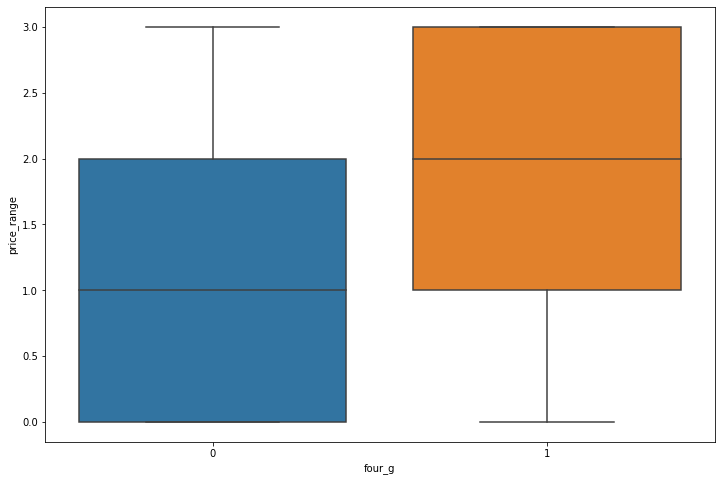

In [76]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8))
sns.boxplot(x = 'four_g', y = 'price_range', data = df)

##### 1. Why did you pick the specific chart?

I used a box plot to visualize the distribution of the data , I can also see the median value of phone that have 4g and do not have 4g. This kind of plot can also be use to look for outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

From this plot it is pretty clear the median price of phones with 4G support is higher than the median price of phones without 4G support. This shows that 4G phones are priced higher than non 4G phones.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, it is clear that people are ready to pay more to purchase phones that support 4g, the phone companies can try and decrease the price of the 4G phones which would draw more people into buying the product since they will be getting a 4G phone for a cheaper price.

#### Chart - 7

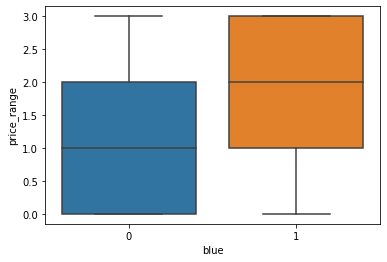

In [91]:
# Chart - 7 visualization code
sns.boxplot(x = 'blue', y = 'price_range', data = df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [40]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [41]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [42]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [43]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [44]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [45]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [46]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [47]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [54]:
# Expand Contraction

#### 2. Lower Casing

In [55]:
# Lower Casing

#### 3. Removing Punctuations

In [56]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords

In [59]:
# Remove White spaces

#### 6. Rephrase Text

In [60]:
# Rephrase Text

#### 7. Tokenization

In [61]:
# Tokenization

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [63]:
# POS Taging

#### 10. Text Vectorization

In [64]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [66]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [67]:
# Transform Your data

### 6. Data Scaling

In [68]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [69]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [71]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [80]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [81]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***